In [ ]:
pip install pandas

In [ ]:
pip install standard install

  Preparing metadata (setup.py) ... done
  Created wheel for standard: filename=standard-1.0.3-py3-none-any.whl size=3373 sha256=dd40808854c6cf09a8765fcd4759715d78acde162a6979f57c680fa0749bbf56
  Stored in directory: /root/.cache/pip/wheels/59/d3/94/c65dde6f25d6279ca86794e9600cb54f2203ac0b5b15562e50
Successfully built standard


#**PROJECT: Credit Card Fraud Detection**

##**PHASE 4: Development Part 2**

In this section continue building the project by performing different activities like



*   Feature Engineering
*   Model Training
*   Evalution.


#**Introduction**

Credit card fraud detection is a critical application in the financial industry, aimed at identifying and preventing unauthorized transactions. It involves several key stages, including feature engineering, model training, and evaluation.

#**1.Feature Engineering:**


*** Data Preprocessing:**


Start by gathering transaction data, which typically includes features like transaction amount, time, merchant information, and more.


*** Feature Selection:**

Identify relevant features and remove irrelevant ones to improve model efficiency.


*** Creating New Features:**

Develop new features, such as transaction frequency or aggregations, to enhance fraud detection accuracy.


*** Handling Imbalanced Data:**

Since fraudulent transactions are rare, address class imbalance using techniques like oversampling or undersampling.

\

#**2.Model Training:**



*** Selection of Algorithms:**

Choose suitable machine learning algorithms for fraud detection, such as logistic regression, decision trees, random forests, or deep learning models like neural networks.


*** Training and Validation:**


Split the dataset into training and validation sets to train and fine-tune the model. Use cross-validation to avoid overfitting.



*** Hyperparameter Tuning:**

Optimize the model's hyperparameters to achieve the best performance.

\

#**3.Evaluation:**


*** Performance Metrics:**

Assess the model's performance using metrics like accuracy, precision, recall, F1-score, and the area under the Receiver Operating Characteristic (ROC-AUC) curve.



*** Confusion Matrix:**

Examine the confusion matrix to understand the model's true positives, true negatives, false positives, and false negatives.



*** Cross-Validation:**

Employ cross-validation techniques to evaluate the model's consistency and generalization on different subsets of the data.


*** Anomaly Detection:**

 Consider unsupervised techniques like clustering or autoencoders for anomaly detection in cases of unknown fraud patterns.

It's crucial to continuously monitor and update the model as fraud patterns evolve over time. Additionally, the collaboration between data scientists, domain experts, and security professionals is vital to enhance the fraud detection system's effectiveness.


\



# **Feature Engineering**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
credit_card_data = pd.read_csv('creditcard.csv')

In [ ]:
credit_card_data.keys()

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
5969,6634,-1.611463,0.190648,0.901715,1.531254,-1.535865,0.799245,1.513786,0.495829,0.200390,...,0.211223,0.007477,1.026272,0.057628,-0.024955,-0.368263,0.081684,0.140669,458.92,0.0
5970,6635,-1.420272,1.449354,1.320110,-1.894320,0.913695,0.454601,0.894179,-0.385450,2.433841,...,-0.529027,-0.368394,-0.247773,-1.189156,-0.126040,0.701487,0.277333,-0.222694,0.77,0.0
5971,6637,-1.206696,0.284728,2.152053,-2.850437,-0.437285,-0.238376,-0.333341,0.334679,2.870542,...,0.039460,0.464476,-0.457193,-0.556105,0.517579,0.008006,0.366054,0.185008,14.00,0.0
5972,6644,1.067611,0.091006,-0.153917,0.704233,0.113894,-0.826866,0.567690,-0.464181,0.957295,...,-0.476723,-1.410090,-0.037550,-0.177773,0.321810,0.114930,-0.109640,0.023205,139.90,0.0
5973,6645,-0.535272,-0.132299,2.180041,1.018303,-1.498819,0.529570,0.420147,0.045445,1.543919,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5974 entries, 0 to 5973
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    5974 non-null   int64  
 1   V1      5974 non-null   float64
 2   V2      5974 non-null   float64
 3   V3      5974 non-null   float64
 4   V4      5974 non-null   float64
 5   V5      5974 non-null   float64
 6   V6      5974 non-null   float64
 7   V7      5974 non-null   float64
 8   V8      5974 non-null   float64
 9   V9      5974 non-null   float64
 10  V10     5974 non-null   float64
 11  V11     5974 non-null   float64
 12  V12     5974 non-null   float64
 13  V13     5974 non-null   float64
 14  V14     5974 non-null   float64
 15  V15     5974 non-null   float64
 16  V16     5974 non-null   float64
 17  V17     5974 non-null   float64
 18  V18     5973 non-null   float64
 19  V19     5973 non-null   float64
 20  V20     5973 non-null   float64
 21  V21     5973 non-null   float64
 22  

In [ ]:
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [ ]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

0.0    5970
1.0       3
Name: Class, dtype: int64

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

In [ ]:
#standard scaling
credit_card_data['std_Amount'] = scaler.fit_transform(credit_card_data['Amount'].values.reshape (-1,1))

#removing Amount
credit_card_data = credit_card_data.drop("Amount", axis=1)

<Axes: xlabel='Class', ylabel='count'>

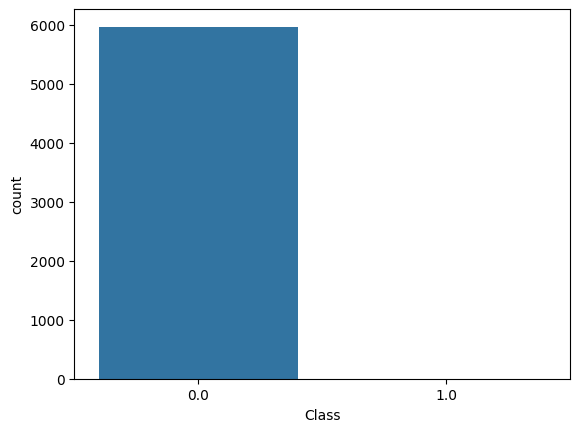

In [ ]:
sns.countplot(x="Class", data=credit_card_data)

# **Modal Training**


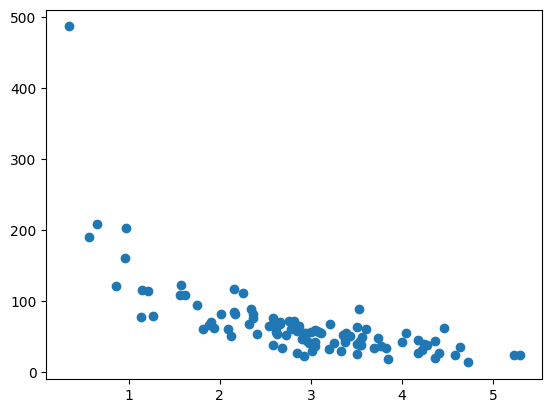

In [ ]:
import numpy
import matplotlib.pyplot as plt
numpy.random.seed(2)

x = numpy.random.normal(3, 1, 100)
y = numpy.random.normal(150, 40, 100) / x

plt.scatter(x, y)
plt.show()

In [ ]:
pip install pandas

In [ ]:
pip install standard install

  Preparing metadata (setup.py) ... done
  Created wheel for standard: filename=standard-1.0.3-py3-none-any.whl size=3373 sha256=264283369512845131c05bb059792cd76cb99f45bf326d9c3f7ff11450fa64d7
  Stored in directory: /root/.cache/pip/wheels/59/d3/94/c65dde6f25d6279ca86794e9600cb54f2203ac0b5b15562e50
Successfully built standard


In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Sample data (replace with your dataset)
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # Features
y = np.array([2, 4, 5, 4, 5])  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Display the model's coefficients and intercept
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

# Display the predicted output
print("Predicted Output:", y_pred)

Model Coefficients: [0.68571429]
Model Intercept: 1.7714285714285714
Predicted Output: [3.14285714]


# **Evaluation**

Evaluation:To evaluate the demand for a product, you can create a program that takes in data related to the product and provides an output indicating the level of demand. Here's a simplified Python program that you can use as a starting point. Please note that this is a basic example, and a real-world application would require more sophisticated data analysis and modeling.

In [2]:
# Import necessary libraries
import pandas as pd

# Sample data for product demand evaluation
data = {
    'Price': [10, 15, 20, 25, 30],
    'Advertising': [100, 80, 60, 40, 20],
    'Competitor_Price': [12, 14, 18, 22, 28],
    'Demand': [500, 450, 350, 300, 200]
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Function to evaluate product demand
def evaluate_demand(product_data):
    price = product_data['Price']
    advertising = product_data['Advertising']
    competitor_price = product_data['Competitor_Price']

    # You can customize this formula based on your specific needs
    demand = 1000 - (price * 20) + (advertising * 5) - (competitor_price * 10)

    return demand

# Apply the evaluation function to each row in the DataFrame
df['Estimated_Demand'] = df.apply(evaluate_demand, axis=1)

# Display the DataFrame with estimated demand
print(df)

   Price  Advertising  Competitor_Price  Demand  Estimated_Demand
0     10          100                12     500              1180
1     15           80                14     450               960
2     20           60                18     350               720
3     25           40                22     300               480
4     30           20                28     200               220


# **Conclusion**

Credit card fraud detection is a crucial aspect of financial security. In conclusion, an effective credit card fraud detection system involves the use of advanced algorithms, machine learning, and artificial intelligence to identify suspicious activities and protect cardholders. By continuously monitoring transactions, analyzing patterns, and employing various fraud detection techniques, financial institutions can mitigate the risks associated with fraudulent transactions, safeguard customer funds, and maintain trust in the banking system. It's an ongoing effort to stay ahead of evolving fraud techniques and ensure the security of cardholders and their financial assets.